<a href="https://colab.research.google.com/github/chandanakolli29/DMTp/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
 import pandas as pd
 import requests
 r = requests.get("https://data.cityofnewyork.us/resource/qp3b-zxtp.json")
 assert r.status_code == 200
 assert "application/json" in r.headers['content-type']
 data = r.json()
 len(data), data[0]
 # Convert the data to a DataFrame
 data_df = pd.DataFrame(data)
 # Display the first few rows of the DataFrame
 print("First few rows of the DataFrame:")
 print(data_df.head())

First few rows of the DataFrame:
  vendorid     tpep_pickup_datetime    tpep_dropoff_datetime passenger_count  \
0        1  2022-01-01T00:35:40.000  2022-01-01T00:53:29.000             2.0   
1        1  2022-01-01T00:33:43.000  2022-01-01T00:42:07.000             1.0   
2        2  2022-01-01T00:53:21.000  2022-01-01T01:02:19.000             1.0   
3        2  2022-01-01T00:25:21.000  2022-01-01T00:35:23.000             1.0   
4        2  2022-01-01T00:36:48.000  2022-01-01T01:14:20.000             1.0   

  trip_distance ratecodeid store_and_fwd_flag pulocationid dolocationid  \
0           3.8        1.0                  N          142          236   
1           2.1        1.0                  N          236           42   
2          0.97        1.0                  N          166          166   
3          1.09        1.0                  N          114           68   
4           4.3        1.0                  N           68          163   

  payment_type fare_amount extra mt

In [18]:
# Information about the DataFrame
print("\nDataFrame Information:")
print(data_df.info())



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   vendorid               1000 non-null   object
 1   tpep_pickup_datetime   1000 non-null   object
 2   tpep_dropoff_datetime  1000 non-null   object
 3   passenger_count        1000 non-null   object
 4   trip_distance          1000 non-null   object
 5   ratecodeid             1000 non-null   object
 6   store_and_fwd_flag     1000 non-null   object
 7   pulocationid           1000 non-null   object
 8   dolocationid           1000 non-null   object
 9   payment_type           1000 non-null   object
 10  fare_amount            1000 non-null   object
 11  extra                  1000 non-null   object
 12  mta_tax                1000 non-null   object
 13  tip_amount             1000 non-null   object
 14  tolls_amount           1000 non-null   object
 15

In [19]:
print("\nSummary Statistics:")
print(data_df.describe())


Summary Statistics:
       vendorid     tpep_pickup_datetime    tpep_dropoff_datetime  \
count      1000                     1000                     1000   
unique        2                      859                      880   
top           2  2022-01-01T00:20:10.000  2022-01-01T00:52:10.000   
freq        677                        4                        4   

       passenger_count trip_distance ratecodeid store_and_fwd_flag  \
count             1000          1000       1000               1000   
unique               7           484          3                  2   
top                1.0           1.3        1.0                  N   
freq               562            19        976                985   

       pulocationid dolocationid payment_type fare_amount extra mta_tax  \
count          1000         1000         1000        1000  1000    1000   
unique           76          123            4          95    11       3   
top             237           79            1         6.0

In [20]:
 # Check for any missing values
 print("\nMissing Values:")
 print(data_df.isnull().sum())
  # Size of the DataFrame
 print("\nSize of the DataFrame:")
 print("Number of rows:", len(data_df))
 print("Number of columns:", len(data_df.columns))



Missing Values:
vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

Size of the DataFrame:
Number of rows: 1000
Number of columns: 19


In [22]:
# Display unique values and their counts for categorical columns
print("\nUnique Values for Categorical Columns:")
for column in data_df.select_dtypes(include=['object']):
 print(f"{column}: {data_df[column].nunique()} unique values")
 print(data_df[column].value_counts().head(10))
 print()
 # Removing all the missing values
data_cleaned = data_df.dropna()
data_cleaned


Unique Values for Categorical Columns:
vendorid: 2 unique values
vendorid
2    677
1    323
Name: count, dtype: int64

tpep_pickup_datetime: 859 unique values
tpep_pickup_datetime
2022-01-01T00:20:10.000    4
2022-01-01T00:48:52.000    4
2022-01-01T00:15:35.000    3
2022-01-01T00:31:06.000    3
2022-01-01T00:11:59.000    3
2022-01-01T00:48:00.000    3
2022-01-01T00:33:50.000    3
2022-01-01T00:36:14.000    3
2022-01-01T00:28:44.000    3
2022-01-01T00:05:26.000    3
Name: count, dtype: int64

tpep_dropoff_datetime: 880 unique values
tpep_dropoff_datetime
2022-01-01T00:52:10.000    4
2022-01-01T00:52:50.000    3
2022-01-01T00:36:59.000    3
2022-01-01T00:36:04.000    3
2022-01-01T00:59:34.000    3
2022-01-01T00:26:49.000    3
2022-01-01T00:58:29.000    3
2022-01-01T00:43:22.000    3
2022-01-01T00:19:27.000    3
2022-01-01T00:50:08.000    2
Name: count, dtype: int64

passenger_count: 7 unique values
passenger_count
1.0    562
2.0    253
3.0     75
4.0     42
0.0     29
5.0     25
6.0    

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01T00:35:40.000,2022-01-01T00:53:29.000,2.0,3.8,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01T00:33:43.000,2022-01-01T00:42:07.000,1.0,2.1,1.0,N,236,42,1,8.0,0.5,0.5,4.0,0.0,0.3,13.3,0.0,0.0
2,2,2022-01-01T00:53:21.000,2022-01-01T01:02:19.000,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01T00:25:21.000,2022-01-01T00:35:23.000,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.0,0.0,0.3,11.8,2.5,0.0
4,2,2022-01-01T00:36:48.000,2022-01-01T01:14:20.000,1.0,4.3,1.0,N,68,163,1,23.5,0.5,0.5,3.0,0.0,0.3,30.3,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,2022-01-01T00:15:15.000,2022-01-01T00:19:08.000,2.0,0.98,1.0,N,79,170,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,0.0
996,2,2022-01-01T00:32:25.000,2022-01-01T00:44:22.000,3.0,2.13,1.0,N,79,233,2,10.0,0.5,0.5,0.0,0.0,0.3,13.8,2.5,0.0
997,2,2022-01-01T00:53:58.000,2022-01-01T00:57:04.000,2.0,0.35,1.0,N,107,107,2,4.0,0.5,0.5,0.0,0.0,0.3,7.8,2.5,0.0
998,2,2022-01-01T00:21:20.000,2022-01-01T00:32:00.000,1.0,1.85,1.0,N,164,249,1,9.0,0.5,0.5,1.0,0.0,0.3,13.8,2.5,0.0


Descriptive Statistics:
       vendorid     tpep_pickup_datetime    tpep_dropoff_datetime  \
count      1000                     1000                     1000   
unique        2                      859                      880   
top           2  2022-01-01T00:20:10.000  2022-01-01T00:52:10.000   
freq        677                        4                        4   

       passenger_count trip_distance ratecodeid store_and_fwd_flag  \
count             1000          1000       1000               1000   
unique               7           484          3                  2   
top                1.0           1.3        1.0                  N   
freq               562            19        976                985   

       pulocationid dolocationid payment_type fare_amount extra mta_tax  \
count          1000         1000         1000        1000  1000    1000   
unique           76          123            4          95    11       3   
top             237           79            1         

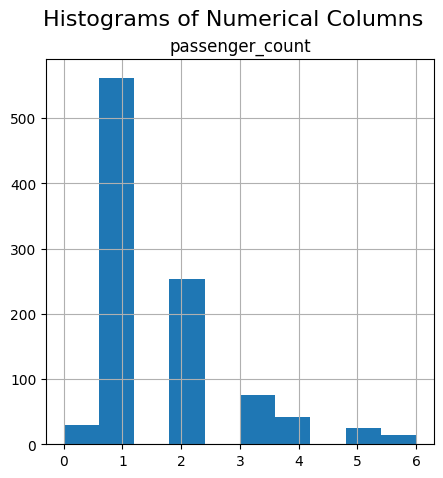

In [23]:
# Calculating descriptive statistics for numerical columns
descriptive_stats = data_cleaned.describe()
print("Descriptive Statistics:")
print(descriptive_stats)
# Check the data types of all columns
print(data_cleaned.dtypes)
data_cleaned['passenger_count'] = pd.to_numeric(data_cleaned['passenger_count'], errors='coerce')
import matplotlib.pyplot as plt
# Plot histograms for numerical columns
data_cleaned.hist(figsize=(5, 5))
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()


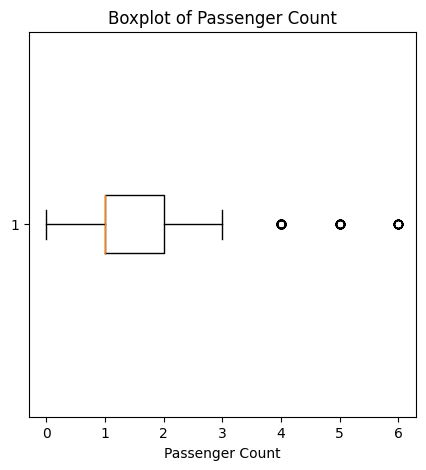

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.boxplot(data_cleaned['passenger_count'], vert=False)
plt.xlabel('Passenger Count')
plt.title('Boxplot of Passenger Count')
plt.show()


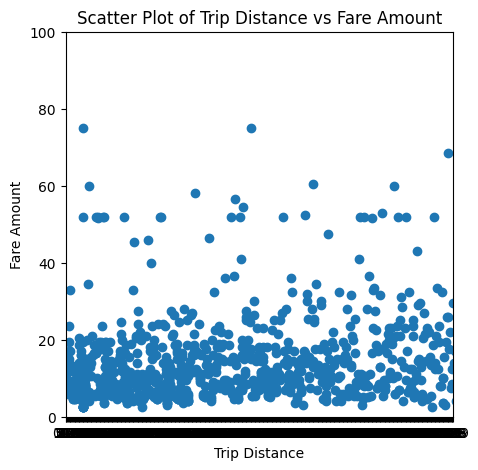

In [25]:
data_cleaned['fare_amount'] = pd.to_numeric(data_cleaned['fare_amount'], errors='coerce')
fare_cutoff = 100
cutoff_data = data_cleaned[data_cleaned['fare_amount'] <= fare_cutoff]
plt.figure(figsize=(5, 5))
plt.scatter(cutoff_data['trip_distance'], cutoff_data['fare_amount'])
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Scatter Plot of Trip Distance vs Fare Amount')
plt.xlim(0, cutoff_data['trip_distance'].max())
plt.ylim(0, fare_cutoff)
plt.show()


Random Forest randomly selecting the features:
Mean Squared Error: 31.57153385212746
R-squared: 0.858316781035528


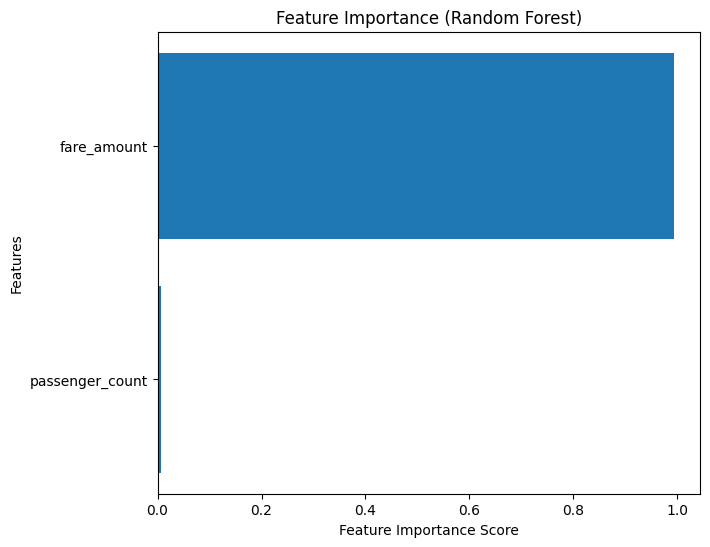

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
numeric = data_cleaned.select_dtypes(include=['float64', 'int64'])
target = 'total_amount'
features = [col for col in numeric.columns if col != target]
X = data_cleaned[features]
y = data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print("\nRandom Forest randomly selecting the features:")
print("Mean Squared Error:", MSE)
print("R-squared:", R2)
plt.figure(figsize=(7, 6))
feature_importance = model.feature_importances_
sorted = feature_importance.argsort()
plt.barh(X.columns[sorted], feature_importance[sorted])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Random Forest)')
plt.show()


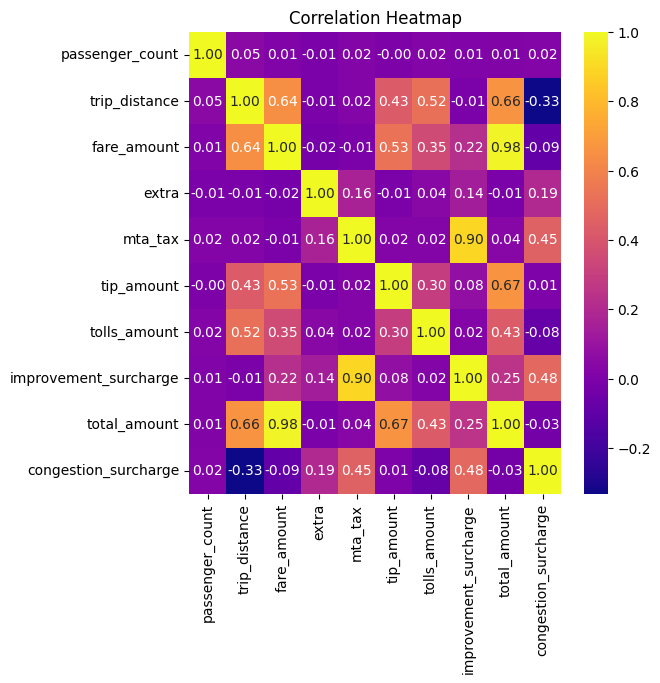

In [27]:
numeric_columns = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].astype(float)
correlation_matrix = data_cleaned[numeric_columns].corr()
#print("Correlated Features: ",correlation_matrix)
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Selected Features: ['trip_distance', 'fare_amount', 'tip_amount']

Random Forest using features based on correlation matrix :
Mean Squared Error: 30.79450933841185
R-squared: 0.8618038252454536


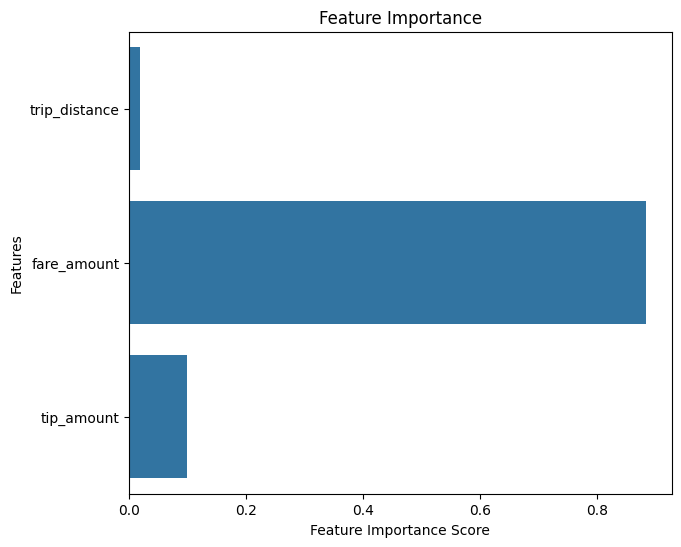

In [28]:
target = 'total_amount'
selected_features = correlation_matrix[target][correlation_matrix[target].abs() > 0.5].index.tolist()
selected_features.remove(target)
print("Selected Features:", selected_features)
X = data_cleaned[selected_features]
y = data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print("\nRandom Forest using features based on correlation matrix :")
print("Mean Squared Error:", MSE)
print("R-squared:", R2)
plt.figure(figsize=(7, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()